<a href="https://colab.research.google.com/github/weso500/QMLPublicationRuns/blob/main/ComparerunsFault3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 75.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.6 MB/s eta 0:00:00


In [2]:
pip install qiskit-machine-learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 48.6 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.3
    Uninstalling scipy-1.16.3:
      Successfully uninstalled scipy-1.16.3
  Attempting uninstall: qiskit
    Found existing installation: qiskit 2.2.3
    Uninstalling qiskit-2.2.3:
      Successfully uninstalled qiskit-2.2.3


In [3]:
pip install pyreadr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 418.3/418.3 kB 4.6 MB/s eta 0:00:00


In [4]:
import pyreadr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [5]:
df_FaultFree = pyreadr.read_r(r'/content/drive/MyDrive/FDA Journal/TEP_FaultFree_Training.RData')['fault_free_training']
df_Faulty = pyreadr.read_r(r'/content/drive/MyDrive/FDA Journal/TEP_Faulty_Training.RData')['faulty_training']

In [6]:
DF = pd.concat([df_FaultFree,df_Faulty]) # Join both fault free and faulty dataset
DF.head()

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.0,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0.0,1.0,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0.0,1.0,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0.0,1.0,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0.0,1.0,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


In [7]:
columns_to_keep = [
    'faultNumber',
    'simulationRun',
    'sample',

    # Core thermal indicators
    'xmeas_9',   # Reactor temperature (directly affected by cooling fault)
    'xmeas_21',  # Reactor cooling water outlet temp (strong fault signature)
    'xmv_10',    # Reactor cooling water flow valve (control response)

    # Secondary thermal propagation effects
    'xmeas_18',  # Stripper temperature
    'xmeas_11',  # Separator temperature
    'xmeas_22',  # Condenser cooling water outlet temperature

    # Compositional response (reaction chemistry changes)
    'xmeas_41',  # Composition of H product
    'xmeas_33',  # Composition of E purge
    'xmeas_35',  # Composition of G purge

    # Reactor state
    'xmeas_8',   # Reactor level (slight coupling with heat exchange)

    # Flow dynamics and purge control
    'xmeas_10',  # Purge rate (minor but diagnostic for late-stage imbalance)
]

DF = DF[columns_to_keep]
display(DF.head())

,faultNumber,simulationRun,sample,xmeas_9,xmeas_21,xmv_10,xmeas_18,xmeas_11,xmeas_22,xmeas_41,xmeas_33,xmeas_35,xmeas_8,xmeas_10
0,0.0,1.0,1,120.41,94.640,41.258,65.732,80.044,77.047,43.828,18.579,4.8436,74.863,0.33818
1,0.0,1.0,2,120.41,94.595,41.359,65.716,80.078,77.434,43.828,18.579,4.8436,75.000,0.33620
2,0.0,1.0,3,120.42,94.605,41.199,65.732,80.220,77.466,43.828,18.765,4.8543,74.771,0.33563
3,0.0,1.0,4,120.39,94.473,41.643,65.781,80.305,77.443,43.828,18.765,4.8543,75.224,0.33553
4,0.0,1.0,5,120.39,94.678,41.507,65.788,80.064,76.947,43.828,18.666,4.8304,75.388,0.32632


In [8]:

from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import PauliFeatureMap
from qiskit.primitives import StatevectorSampler as Sampler
from qiskit_machine_learning.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel

dimension = 11
feature_map = PauliFeatureMap(feature_dimension=dimension, reps=1, entanglement="full")

sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)

kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)

In [9]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import rbf_kernel, pairwise_distances
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_approximation import Nystroem
import matplotlib.pyplot as plt

# ============================================================
# 1️⃣  Helper utilities
# ============================================================

def center_kernel(K):
    """Center kernel (zero-mean in feature space)."""
    n = K.shape[0]
    H = np.eye(n) - np.ones((n, n)) / n
    return H @ K @ H

def normalize_kernel(K):
    """Cosine-normalize kernel."""
    d = np.sqrt(np.clip(np.diag(K), 1e-12, None))
    return K / np.outer(d, d)

def kernel_target_alignment(K, y):
    """KTA between kernel and label kernel."""
    y = y * 2 - 1  # 0/1 → -1/+1
    Y = np.outer(y, y)
    num = np.sum(K * Y)
    denom = np.sqrt(np.sum(K * K) * np.sum(Y * Y))
    return num / denom

def hsic(K, y):
    """Hilbert–Schmidt Independence Criterion."""
    n = K.shape[0]
    H = np.eye(n) - np.ones((n, n)) / n
    L = np.outer(y, y)
    return np.trace(H @ K @ H @ L) / ((n - 1)**2)

def mmd(K_xx, K_yy, K_xy):
    """Maximum Mean Discrepancy."""
    return K_xx.mean() + K_yy.mean() - 2 * K_xy.mean()

def cka(K1, K2):
    """Centered Kernel Alignment between two kernels."""
    K1c, K2c = center_kernel(K1), center_kernel(K2)
    num = np.sum(K1c * K2c)
    denom = np.sqrt(np.sum(K1c**2) * np.sum(K2c**2))
    return num / denom

def kernel_spectrum(K):
    """Return normalized eigenvalue spectrum."""
    Kc = center_kernel(K)
    eigvals = np.sort(np.linalg.eigvalsh(Kc))[::-1]
    eigvals = np.clip(eigvals, 0, None)
    return eigvals / eigvals.sum()

# ============================================================
# 2️⃣  Build consistent data split
# ============================================================

def get_split(DF, fault_id=3, n_train_normals=100, n_test_normals=70, n_test_faulty=5, seed=42):
    sc = StandardScaler()
    fault_free = DF[DF["faultNumber"] == 0].iloc[::50, 3:]
    train_df = fault_free.sample(n=n_train_normals, random_state=seed)
    remaining = fault_free.drop(train_df.index)
    test_normals_df = remaining.sample(n=n_test_normals, random_state=seed + 100)
    faulty_df = DF[DF["faultNumber"] == fault_id].iloc[::30, 3:].sample(n=n_test_faulty, random_state=seed + 200)
    X = sc.fit_transform(pd.concat([train_df, test_normals_df, faulty_df], ignore_index=True))
    y = np.concatenate([
        np.zeros(n_train_normals + n_test_normals, dtype=int),
        np.ones(n_test_faulty, dtype=int)
    ])
    return X, y, sc

# ============================================================
# 3️⃣  Compute and compare kernels
# ============================================================

def compare_kernels(DF, kernel, fault_id=3, gamma='scale', alpha=5.0, nystrom_components=64, seed=42):
    X, y, sc = get_split(DF, fault_id, seed=seed)

    # --- Classical RBF kernel ---
    if gamma == 'scale':
        gamma_val = 1.0 / (X.shape[1] * X.var())
    elif gamma == 'auto':
        gamma_val = 1.0 / X.shape[1]
    else:
        gamma_val = float(gamma)
    K_rbf = rbf_kernel(X, gamma=gamma_val)
    K_rbf = normalize_kernel(center_kernel(K_rbf))

    # --- Quantum Nyström kernel ---
    Xq = alpha * X
    Phi = Nystroem(kernel=lambda A, B=None: kernel.evaluate(x_vec=A, y_vec=B),
                   n_components=min(nystrom_components, len(Xq)-1),
                   random_state=seed)
    Z = Phi.fit_transform(Xq)
    K_q = normalize_kernel(center_kernel(Z @ Z.T))

    # --- Diagnostics ---
    idx_norm = (y == 0)
    idx_fault = (y == 1)

    KTA_rbf = kernel_target_alignment(K_rbf, y)
    KTA_q = kernel_target_alignment(K_q, y)

    HSIC_rbf = hsic(K_rbf, y)
    HSIC_q = hsic(K_q, y)

    Kxx_r, Kyy_r = K_rbf[np.ix_(idx_norm, idx_norm)], K_rbf[np.ix_(idx_fault, idx_fault)]
    Kxy_r = K_rbf[np.ix_(idx_norm, idx_fault)]
    MMD_rbf = mmd(Kxx_r, Kyy_r, Kxy_r)

    Kxx_q, Kyy_q = K_q[np.ix_(idx_norm, idx_norm)], K_q[np.ix_(idx_fault, idx_fault)]
    Kxy_q = K_q[np.ix_(idx_norm, idx_fault)]
    MMD_q = mmd(Kxx_q, Kyy_q, Kxy_q)

    CKA_val = cka(K_rbf, K_q)

    # --- Spectra ---
    eig_rbf = kernel_spectrum(K_rbf)
    eig_q = kernel_spectrum(K_q)

    # --- Report ---
    summary = pd.DataFrame({
        "Metric": ["KTA", "HSIC", "MMD", "CKA (vs RBF)"],
        "RBF": [KTA_rbf, HSIC_rbf, MMD_rbf, np.nan],
        "Quantum": [KTA_q, HSIC_q, MMD_q, CKA_val]
    })
    print("\n=== Kernel Diagnostics (Fault {}) ===".format(fault_id))
    display(summary)

    # --- Plot spectra ---
    plt.figure(figsize=(6,4))
    plt.semilogy(eig_rbf, 'o-', label='RBF Spectrum')
    plt.semilogy(eig_q, 's-', label='Quantum Spectrum')
    plt.title(f"Kernel Eigenvalue Spectrum (Fault {fault_id})")
    plt.xlabel("Eigenvalue Index")
    plt.ylabel("Normalized Magnitude (log scale)")
    plt.legend()
    plt.grid(True)
    plt.show()

    return summary, eig_rbf, eig_q



=== Kernel Diagnostics (Fault 3) ===


,Metric,RBF,Quantum
0,KTA,0.004279,0.470572
1,HSIC,0.000151,0.000129
2,MMD,0.193235,0.165087
3,CKA (vs RBF),NaN,0.079827


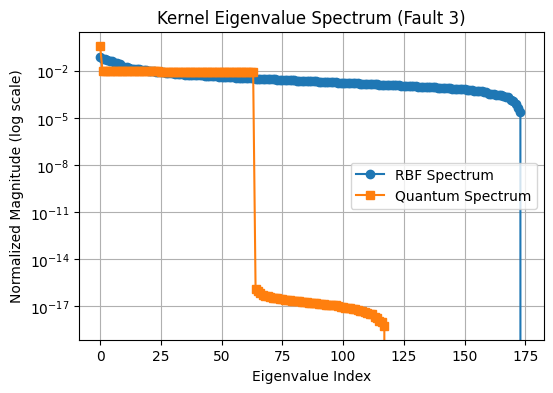

In [11]:

dimension = 11
feature_map = PauliFeatureMap(feature_dimension=dimension, reps=1, entanglement="full")
sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)

kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)

# Run diagnostics for a chosen fault
summary, eig_rbf, eig_q = compare_kernels(DF, kernel, fault_id=3, gamma='scale', alpha=5.0)